<a href="https://colab.research.google.com/github/vilokguliani/Misc_Tools/blob/main/YCBS255_Assignment03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Assignment 3  <font color="blue"> (15 points) </font>

***

### Notes and Instructions
  + You may need additional libraries besides the Python standard library to solve some questions. Import only necessary libraries.
  + If more than one library exist for a same purpose, choose the one you wish as long as it does the task properly.
  + If we want you to use a specific library, then we will state it clearly.
  + Use the exact variable names asked in the questions. When no clear instructions given, feel free to do it the way you would like to.
  + After each question, add the needed number of new cells and place your answers inside the cells.
  + Use text cells for explanations. Use explanation and plain text as much as possible.
  + Do not remove or modify the original cells provided by the instructor.
  + In the following cell you will find some extra options to make your code more readable, including output colors RED, OKBLUE, or output text styles like BOLD or UNDERLINE that. Do not hesitate to use them. As an example, one may output text in red as follows:
  ```python
     print(bcolors.RED + "your text" + bcolors.ENDC)
  ```
  + Comment your code whenever needed using # sign at the beginning of the row.
  + In some questions some of the details needed for solving the problem are **purposely** omitted to encourage additional self-directed research. This, especially, helps you develop some search skills for coding in Python (which is inevitable due to the inconsistent syntax of Python).
  + Do not hesitate to communicate your questions to the TA's or instructors.
    
  Good luck!

In [3]:
# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

## **Part A** <font color="blue">(5 points)</font>

1. **<font color="blue">(1 point)</font>** Generate 100 points equally distanced from $-20$ to $20$ and save them in a `numpy` array `x1`. Now, create $4$ more `numpy` arrays by raising `x1` to the power of $2,3,4,5$, and call them `x2`, `x3`, `x4` and `x5`, respectively.
3. **<font color="blue">(1 point)</font>** Create your response `y`, a new `numpy` array, defined as $y= 1.75 + 5 x_1 + 0.05 x_3 - 10.3 x_5 + \varepsilon$, where $\varepsilon \sim \mathcal{N}(0, 4)$.
4. **<font color="blue">(2 points)</font>** Using $5$-fold cross-validation, with a reasonable train-test proportion, train a **lasso** regression model including all $x_1, x_2, x_3 , x_4 , x_5$, and for $10$ different  pre-determined tuning parameters.
5. **<font color="blue">(1 point)</font>** Plot the **cross-validated mean squared errors** vs the tuning parameter's values
 and chose the best tuning parameter based on the plot. Does the best model chosen perform **variable selection**?

In [4]:
#1
import numpy as np
x1 = np.linspace(-20, 20, 101)
x1

# Create 4 more numpy arrays by raising x1 to the power of 2, 3, 4, and 5
x2 = x1**2
x3 = x1**3
x4 = x1**4
x5 = x1**5

# Print the arrays to verify the results
print("x1:", x1)
print("x2:", x2)
print("x3:", x3)
print("x4:", x4)
print("x5:", x5)

array([-20. , -19.6, -19.2, -18.8, -18.4, -18. , -17.6, -17.2, -16.8,
       -16.4, -16. , -15.6, -15.2, -14.8, -14.4, -14. , -13.6, -13.2,
       -12.8, -12.4, -12. , -11.6, -11.2, -10.8, -10.4, -10. ,  -9.6,
        -9.2,  -8.8,  -8.4,  -8. ,  -7.6,  -7.2,  -6.8,  -6.4,  -6. ,
        -5.6,  -5.2,  -4.8,  -4.4,  -4. ,  -3.6,  -3.2,  -2.8,  -2.4,
        -2. ,  -1.6,  -1.2,  -0.8,  -0.4,   0. ,   0.4,   0.8,   1.2,
         1.6,   2. ,   2.4,   2.8,   3.2,   3.6,   4. ,   4.4,   4.8,
         5.2,   5.6,   6. ,   6.4,   6.8,   7.2,   7.6,   8. ,   8.4,
         8.8,   9.2,   9.6,  10. ,  10.4,  10.8,  11.2,  11.6,  12. ,
        12.4,  12.8,  13.2,  13.6,  14. ,  14.4,  14.8,  15.2,  15.6,
        16. ,  16.4,  16.8,  17.2,  17.6,  18. ,  18.4,  18.8,  19.2,
        19.6,  20. ])

x1: [-20.  -19.6 -19.2 -18.8 -18.4 -18.  -17.6 -17.2 -16.8 -16.4 -16.  -15.6
 -15.2 -14.8 -14.4 -14.  -13.6 -13.2 -12.8 -12.4 -12.  -11.6 -11.2 -10.8
 -10.4 -10.   -9.6  -9.2  -8.8  -8.4  -8.   -7.6  -7.2  -6.8  -6.4  -6.
  -5.6  -5.2  -4.8  -4.4  -4.   -3.6  -3.2  -2.8  -2.4  -2.   -1.6  -1.2
  -0.8  -0.4   0.    0.4   0.8   1.2   1.6   2.    2.4   2.8   3.2   3.6
   4.    4.4   4.8   5.2   5.6   6.    6.4   6.8   7.2   7.6   8.    8.4
   8.8   9.2   9.6  10.   10.4  10.8  11.2  11.6  12.   12.4  12.8  13.2
  13.6  14.   14.4  14.8  15.2  15.6  16.   16.4  16.8  17.2  17.6  18.
  18.4  18.8  19.2  19.6  20. ]
x2: [4.0000e+02 3.8416e+02 3.6864e+02 3.5344e+02 3.3856e+02 3.2400e+02
 3.0976e+02 2.9584e+02 2.8224e+02 2.6896e+02 2.5600e+02 2.4336e+02
 2.3104e+02 2.1904e+02 2.0736e+02 1.9600e+02 1.8496e+02 1.7424e+02
 1.6384e+02 1.5376e+02 1.4400e+02 1.3456e+02 1.2544e+02 1.1664e+02
 1.0816e+02 1.0000e+02 9.2160e+01 8.4640e+01 7.7440e+01 7.0560e+01
 6.4000e+01 5.7760e+01 5.1840e+01 4.6240e+0

In [5]:
#2
# Generate the noise term ε from a normal distribution with mean 0 and standard deviation 4
epsilon = np.random.normal(0, 4, 101)

# Calculate y using the given formula
𝑦 = 1.75 + 5*(x1) + 0.05*(x3) - 10.3*(x5) + epsilon

# Print the result to verify
print("y:", y)

y: [ 3.29595061e+07  2.97927636e+07  2.68742394e+07  2.41890546e+07
  2.17229269e+07  1.94621763e+07  1.73936825e+07  1.55049315e+07
  1.37839521e+07  1.22192832e+07  1.08000499e+07  9.51585732e+06
  8.35684577e+06  7.31361321e+06  6.37727036e+06  5.53938372e+06
  4.79197527e+06  4.12751319e+06  3.53887925e+06  3.01941757e+06
  2.56282021e+06  2.16321667e+06  1.81508291e+06  1.51329320e+06
  1.25304600e+06  1.02990881e+06  8.39741994e+05  6.78775985e+05
  5.43482963e+05  4.30681892e+05  3.37443863e+05  2.61097927e+05
  1.99241663e+05  1.49710626e+05  1.10549348e+05  8.00506438e+04
  5.66980071e+04  3.91360388e+04  2.62161110e+04  1.69640182e+04
  1.05301835e+04  6.20842826e+03  3.43681031e+03  1.76477965e+03
  8.00263374e+02  3.26414011e+02  1.03428206e+02  2.36737129e+01
  4.79467366e+00  4.67733472e+00  4.69790431e+00  5.73986001e+00
  3.33699085e-01 -1.23298991e+01 -1.00814250e+02 -3.24563005e+02
 -8.10969955e+02 -1.75450430e+03 -3.43851735e+03 -6.20591862e+03
 -1.05206967e+04 -1.69

In [6]:
#3
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, cross_val_score

#Note: Given this is k-fold CV, we don't need a train-test split

# Step 1: Prepare the feature matrix and response vector
X = np.vstack((x1, x2, x3, x4, x5)).T
print(X)

# Step 2: Define the tuning parameters for Lasso regression
alpha_values = np.linspace(100, 550, 10)  # 10 values from 1e-4 to 1e0

# Step 3: Perform 5-fold cross-validation and store the results
results = []
kf = KFold(n_splits=5, shuffle=True, random_state=101)

# Train and evaluate Lasso regression models
for alpha in alpha_values:
    lasso = Lasso(alpha=alpha)
    scores = cross_val_score(lasso, X, y, cv=kf, scoring='neg_mean_squared_error')
    mean_mse = -scores.mean()
    results.append((alpha, mean_mse))
    print(f"Alpha: {alpha}, Mean MSE: {mean_mse}, Std MSE: {scores.std()}")

[[-2.00000000e+01  4.00000000e+02 -8.00000000e+03  1.60000000e+05
  -3.20000000e+06]
 [-1.96000000e+01  3.84160000e+02 -7.52953600e+03  1.47578906e+05
  -2.89254655e+06]
 [-1.92000000e+01  3.68640000e+02 -7.07788800e+03  1.35895450e+05
  -2.60919263e+06]
 [-1.88000000e+01  3.53440000e+02 -6.64467200e+03  1.24919834e+05
  -2.34849287e+06]
 [-1.84000000e+01  3.38560000e+02 -6.22950400e+03  1.14622874e+05
  -2.10906087e+06]
 [-1.80000000e+01  3.24000000e+02 -5.83200000e+03  1.04976000e+05
  -1.88956800e+06]
 [-1.76000000e+01  3.09760000e+02 -5.45177600e+03  9.59512576e+04
  -1.68874213e+06]
 [-1.72000000e+01  2.95840000e+02 -5.08844800e+03  8.75213056e+04
  -1.50536646e+06]
 [-1.68000000e+01  2.82240000e+02 -4.74163200e+03  7.96594176e+04
  -1.33827822e+06]
 [-1.64000000e+01  2.68960000e+02 -4.41094400e+03  7.23394816e+04
  -1.18636750e+06]
 [-1.60000000e+01  2.56000000e+02 -4.09600000e+03  6.55360000e+04
  -1.04857600e+06]
 [-1.56000000e+01  2.43360000e+02 -3.79641600e+03  5.92240896e+04

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='alpha', ylabel='mean_mse'>

Text(0.5, 0, 'Alpha')

Text(0, 0.5, 'Mean Cross-Validated MSE')

Text(0.5, 1.0, 'Cross-Validated Mean Squared Errors for Different Alphas')

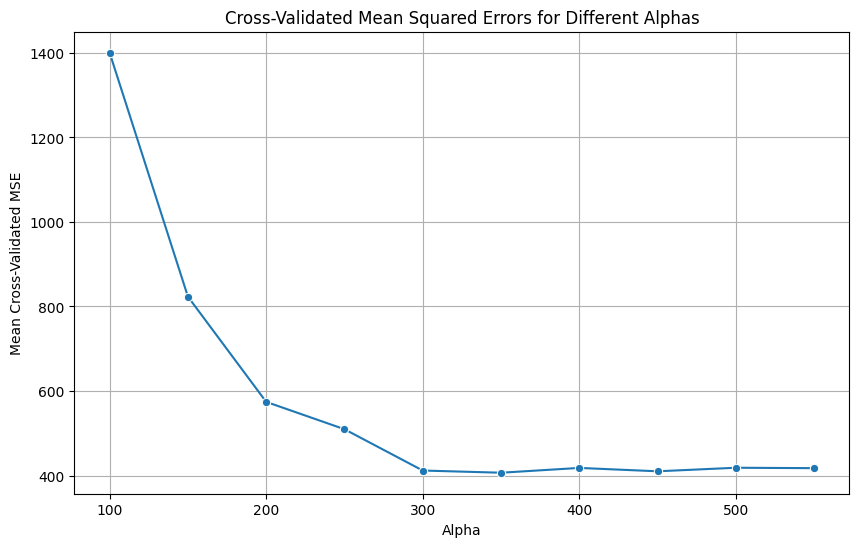

In [7]:
#4
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 4: Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=['alpha', 'mean_mse'])

# Step 5: Plot the cross-validated MSEs
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='alpha', y='mean_mse', marker='o')
#plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Cross-Validated MSE')
plt.title('Cross-Validated Mean Squared Errors for Different Alphas')
plt.grid(True)
plt.show()

In [8]:
#4
print("Lasso (Least Absolute Shrinkage and Selection Operator) regression method performs variable selection as part of its regularization process.\nThe key feature of Lasso regression is that it can shrink some coefficients to exactly zero when the regularization parameter 𝛼 is sufficiently large.\nThis property leads to the selection of a subset of the variables, effectively performing variable selection.")

Lasso (Least Absolute Shrinkage and Selection Operator) regression method performs variable selection as part of its regularization process.
The key feature of Lasso regression is that it can shrink some coefficients to exactly zero when the regularization parameter 𝛼 is sufficiently large.
This property leads to the selection of a subset of the variables, effectively performing variable selection.


In [9]:
#4
# Find the best alpha, i.e. the one with the lowest MSE
best_alpha = results_df.loc[results_df['mean_mse'].idxmin()]['alpha']

# Train the best Lasso model on the full dataset
best_lasso = Lasso(alpha=best_alpha)
best_lasso.fit(X, y)

# Print the coefficients to see which variables are selected
coefficients = best_lasso.coef_
intercept = best_lasso.intercept_

print("Best alpha:", best_alpha)
print("Intercept:", intercept)
print("Coefficients:", coefficients)

Lasso(alpha=350.0)

Best alpha: 350.0
Intercept: 1.6901280758129706
Coefficients: [ 0.00000000e+00 -0.00000000e+00  7.43186243e-02  7.55973657e-06
 -1.03000264e+01]


## **Part B** <font color="blue">(3 points)</font>
For this part upload `Wage.csv`.

1. **<font color="blue">(2 points)</font>** Perform polynomial regression to predict `wage` using `age`. Use cross-validation to select the optimal degree $d$ for the polynomial. What degree was chosen? Make a plot of
the resulting polynomial fit to the data.
2. **<font color="blue">(1 point)</font>** Fit a step function to predict `wage` using `age` , and perform cross-validation to choose the optimal number of cuts. Make a plot of the fit obtained.


In [18]:
#0 Load and Explore the Datasets

# Using our Colab traditional method (Part 1)

from google.colab import files
uploaded = files.upload()

wage = pd.read_csv('Wage.csv').dropna(axis='columns')

# Explore the data to understand its structure
print("wage head:\n", wage.head())
print("\n wage shape:", wage.shape)
print("\n wage info: ", wage.info())

wage.head()

Saving Wage.csv to Wage (3).csv
wage head:
    Unnamed: 0  year  age      sex            maritl      race  \
0      231655  2006   18  1. Male  1. Never Married  1. White   
1       86582  2004   24  1. Male  1. Never Married  1. White   
2      161300  2003   45  1. Male        2. Married  1. White   
3      155159  2003   43  1. Male        2. Married  3. Asian   
4       11443  2005   50  1. Male       4. Divorced  1. White   

         education              region        jobclass          health  \
0     1. < HS Grad  2. Middle Atlantic   1. Industrial       1. <=Good   
1  4. College Grad  2. Middle Atlantic  2. Information  2. >=Very Good   
2  3. Some College  2. Middle Atlantic   1. Industrial       1. <=Good   
3  4. College Grad  2. Middle Atlantic  2. Information  2. >=Very Good   
4       2. HS Grad  2. Middle Atlantic  2. Information       1. <=Good   

  health_ins   logwage        wage  
0      2. No  4.318063   75.043154  
1      2. No  4.255273   70.476020  
2     1. 

Unnamed: 0  year  age      sex            maritl      race  \
0      231655  2006   18  1. Male  1. Never Married  1. White   
1       86582  2004   24  1. Male  1. Never Married  1. White   
2      161300  2003   45  1. Male        2. Married  1. White   
3      155159  2003   43  1. Male        2. Married  3. Asian   
4       11443  2005   50  1. Male       4. Divorced  1. White   

         education              region        jobclass          health  \
0     1. < HS Grad  2. Middle Atlantic   1. Industrial       1. <=Good   
1  4. College Grad  2. Middle Atlantic  2. Information  2. >=Very Good   
2  3. Some College  2. Middle Atlantic   1. Industrial       1. <=Good   
3  4. College Grad  2. Middle Atlantic  2. Information  2. >=Very Good   
4       2. HS Grad  2. Middle Atlantic  2. Information       1. <=Good   

  health_ins   logwage        wage  
0      2. No  4.318063   75.043154  
1      2. No  4.255273   70.476020  
2     1. Yes  4.875061  130.982177  
3     1. Yes  5.041393  154.685293  
4     1. Yes  4.318063   75.043154

In [19]:
print("\n wage describe:\n", wage.describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99], include='all'))


 wage describe:
            Unnamed: 0         year          age      sex      maritl  \
count     3000.000000  3000.000000  3000.000000     3000        3000   
unique            NaN          NaN          NaN        1           5   
top               NaN          NaN          NaN  1. Male  2. Married   
freq              NaN          NaN          NaN     3000        2074   
mean    218883.373000  2005.791000    42.414667      NaN         NaN   
std     145654.072587     2.026167    11.542406      NaN         NaN   
min       7373.000000  2003.000000    18.000000      NaN         NaN   
1%        7821.940000  2003.000000    20.000000      NaN         NaN   
10%      12396.400000  2003.000000    27.000000      NaN         NaN   
25%      85622.250000  2004.000000    33.750000      NaN         NaN   
50%     228799.500000  2006.000000    42.000000      NaN         NaN   
75%     374759.500000  2008.000000    51.000000      NaN         NaN   
90%     448821.600000  2009.000000    58.00000

In [20]:
wage['health'].value_counts()

health
2. >=Very Good    2142
1. <=Good          858
Name: count, dtype: int64

In [ ]:
#This tells us the data is from 2003 to 2009, with people aged 18-80.
#All are males in the mid-atlantic, and most are married and white. Most are also in very good health.
#About half work in Industrial and the other half in Information.

Optimal degree for polynomial regression: 7


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=7)),
                ('linearregression', LinearRegression())])

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Wage')

Text(0.5, 1.0, 'Polynomial Regression Fit')

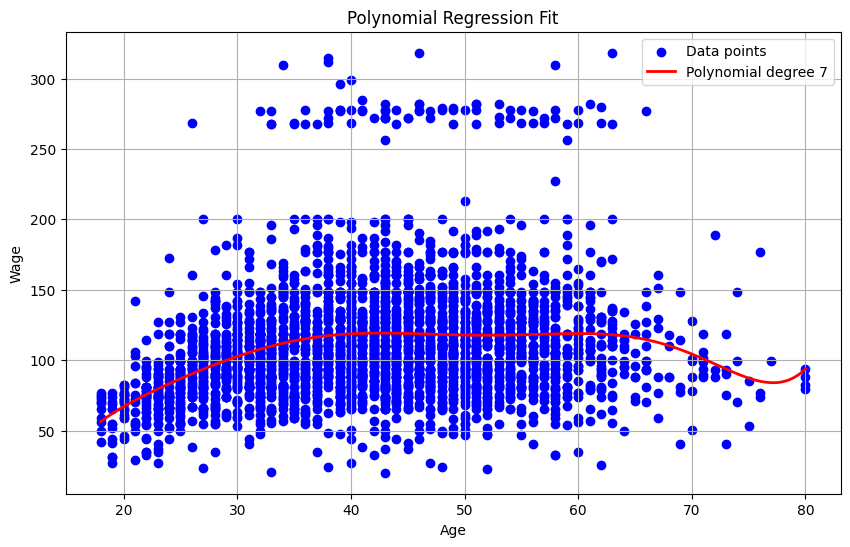

In [21]:
#1
#Perform polynomial regression to predict wage using age.
#Use cross-validation to select the optimal degree 𝑑  for the polynomial.
#What degree was chosen? 7
#Make a plot of the resulting polynomial fit to the data.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Step 1 Extract age and wage columns
X = wage[['age']].values
y = wage['wage'].values #single bracket makes 1D array, which is often simpler and more natural when dealing with target variables.

# Step 2: Polynomial regression with cross-validation
degrees = np.arange(1, 11) #Testing polynomial degrees from 1 to 10 is a common practice as it covers a reasonable range of model complexities. Lower degrees might underfit the data, while very high degrees might overfit.
cv = KFold(n_splits=5, shuffle=True, random_state=101)

# Store the cross-validated scores for each degree
cv_scores = []

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    cv_scores.append(-scores.mean())

# Find the optimal degree with the lowest MSE
optimal_degree = degrees[np.argmin(cv_scores)]
print("Optimal degree for polynomial regression:", optimal_degree)

# Step 3: Train the best model
best_model = make_pipeline(PolynomialFeatures(optimal_degree), LinearRegression())
best_model.fit(X, y)

# Step 4: Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
X_plot = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_plot = best_model.predict(X_plot)
plt.plot(X_plot, y_plot, color='red', linewidth=2, label=f'Polynomial degree {optimal_degree}')
plt.xlabel('Age')
plt.ylabel('Wage')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1200x500 with 0 Axes>

<Axes: >

<Axes: xlabel='age', ylabel='Count'>

Text(0.5, 1.0, 'Age Distribution')

<Axes: >

<Axes: xlabel='wage', ylabel='Count'>

Text(0.5, 1.0, 'Wage Distribution')

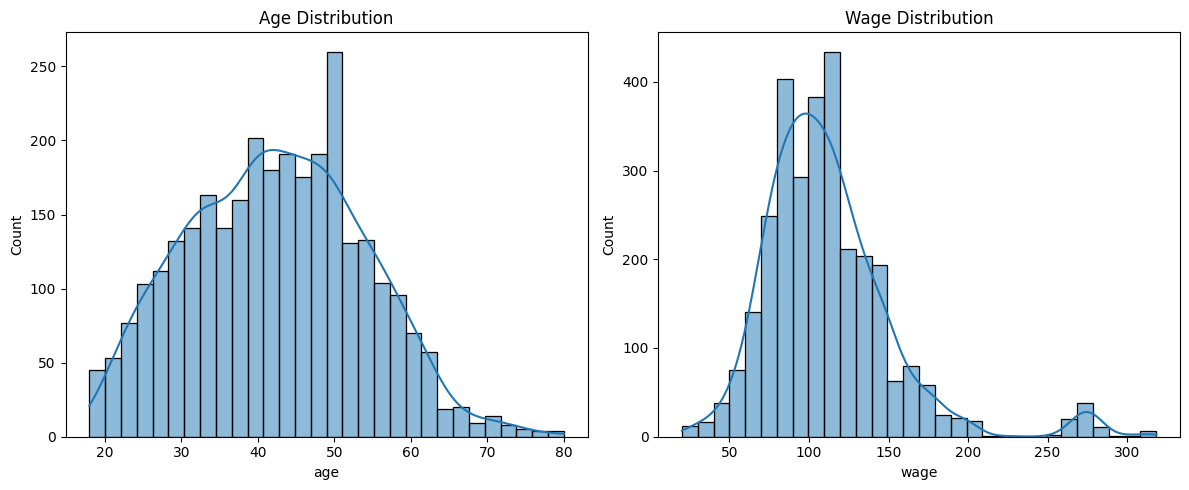

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Wage')

Text(0.5, 1.0, 'Scatter Plot of Age vs. Wage')

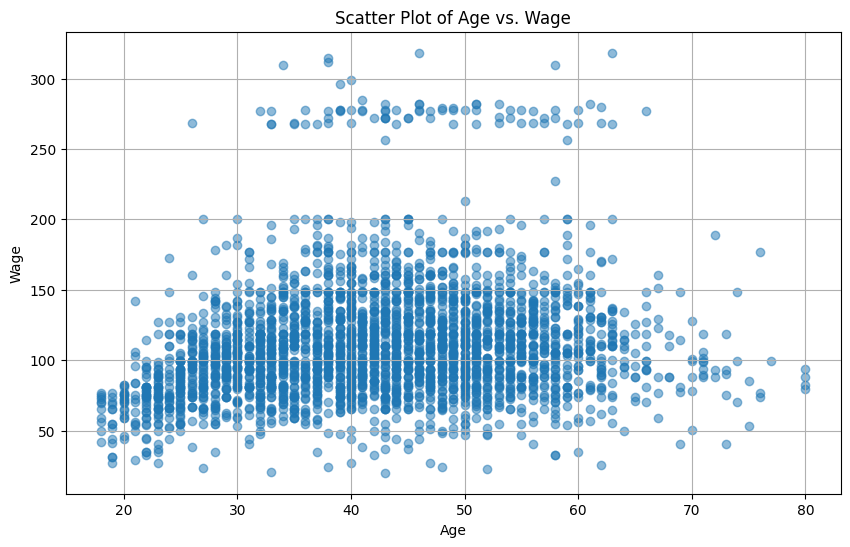

In [22]:
#2
#Visualize age and wage to better chose Strategy in KBinsDiscretizer
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of ages and wages
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(wage['age'], kde=True, bins=30)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(wage['wage'], kde=True, bins=30)
plt.title('Wage Distribution')

plt.tight_layout()
plt.show()

# Plot age against wage to visually assess the relationship
plt.figure(figsize=(10, 6))
plt.scatter(wage['age'], wage['wage'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Wage')
plt.title('Scatter Plot of Age vs. Wage')
plt.grid(True)
plt.show()

In [ ]:
#2 Appears like age and wage are mostly linear, suggesting uniform strategy would work well.

Optimal number of bins: 11


Pipeline(steps=[('kbinsdiscretizer',
                 KBinsDiscretizer(n_bins=11, strategy='uniform',
                                  subsample=None)),
                ('linearregression', LinearRegression())])

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Wage')

Text(0.5, 1.0, 'Step Function Fit (bins=11)')

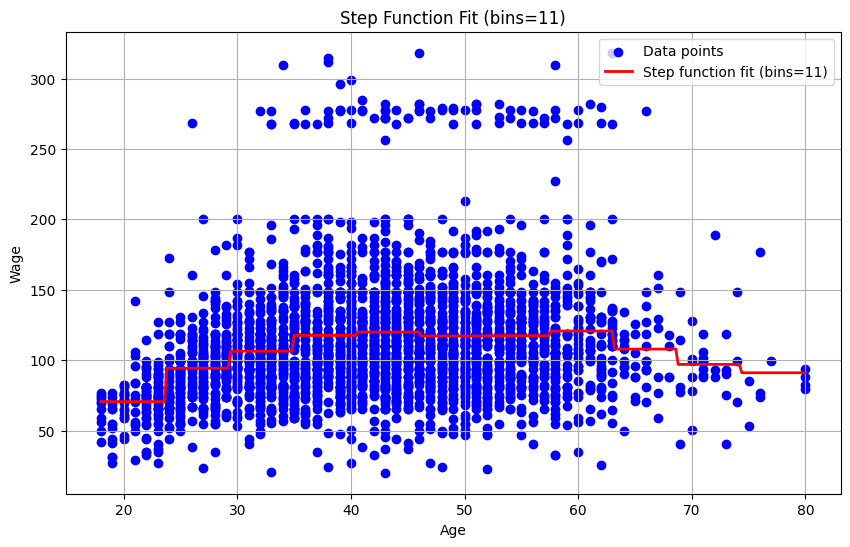

In [23]:
#2
#Fit a step function to predict wage using age , and perform cross-validation to choose the optimal number of cuts.
#Make a plot of the fit obtained.

from sklearn.preprocessing import KBinsDiscretizer

# Define the KFold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=101)

# Function to perform step function regression and cross-validation
def step_function_regression(n_bins, X, y):
    step_model = make_pipeline(
        KBinsDiscretizer(n_bins=n_bins, encode='onehot', strategy='uniform', subsample=None),
        LinearRegression()
    )
    scores = cross_val_score(step_model, X, y, cv=cv, scoring='neg_mean_squared_error')
    return scores.mean()

# Determine the optimal number of bins (cuts) using cross-validation
bins = list(range(2, 21))  # Testing bins from 2 to 20
cv_scores_bins = [step_function_regression(n_bins, X, y) for n_bins in bins]

# Optimal number of bins with the highest cross-validation score (lowest mean squared error)
optimal_bins = bins[np.argmax(cv_scores_bins)]
print("Optimal number of bins:", optimal_bins)

# Fit the model with the optimal number of bins
step_model = make_pipeline(
    KBinsDiscretizer(n_bins=optimal_bins, encode='onehot', strategy='uniform', subsample=None),
    LinearRegression()
)
step_model.fit(X, y)

# Generate predictions for the plot
X_plot = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_step_plot = step_model.predict(X_plot)

# Plot the data and the step function fit
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_plot, y_step_plot, color='red', linewidth=2, label=f'Step function fit (bins={optimal_bins})')
plt.xlabel('Age')
plt.ylabel('Wage')
plt.title(f'Step Function Fit (bins={optimal_bins})')
plt.legend()
plt.grid(True)
plt.show()

Optimal number of bins for uniform: 11
Optimal number of bins for quantile: 20
Optimal number of bins for kmeans: 16
The best strategy is uniform with 11 bins


Pipeline(steps=[('kbinsdiscretizer',
                 KBinsDiscretizer(n_bins=11, strategy='uniform',
                                  subsample=None)),
                ('linearregression', LinearRegression())])

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Wage')

Text(0.5, 1.0, 'Step Function Fit (bins=11, strategy=uniform)')

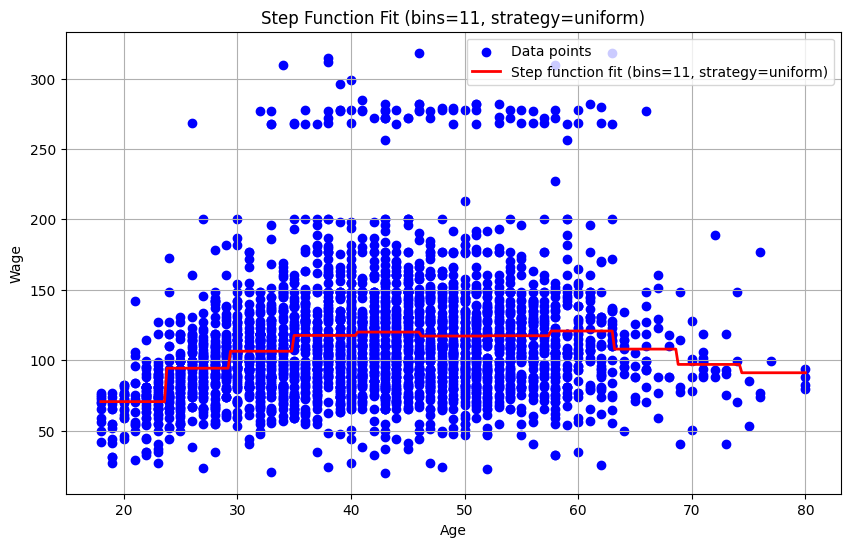

Pipeline(steps=[('kbinsdiscretizer',
                 KBinsDiscretizer(n_bins=20, subsample=None)),
                ('linearregression', LinearRegression())])

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Wage')

Text(0.5, 1.0, 'Step Function Fit (bins=20, strategy=quantile)')

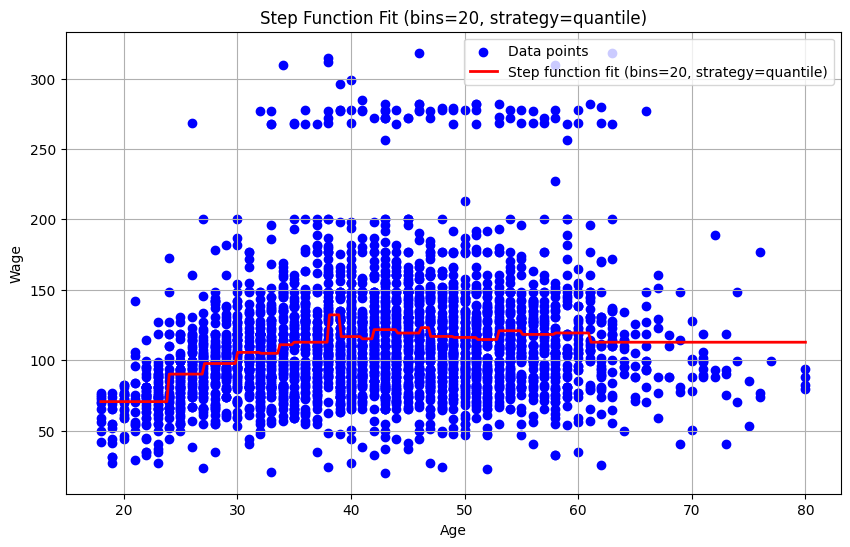

Pipeline(steps=[('kbinsdiscretizer',
                 KBinsDiscretizer(n_bins=16, strategy='kmeans',
                                  subsample=None)),
                ('linearregression', LinearRegression())])

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Wage')

Text(0.5, 1.0, 'Step Function Fit (bins=16, strategy=kmeans)')

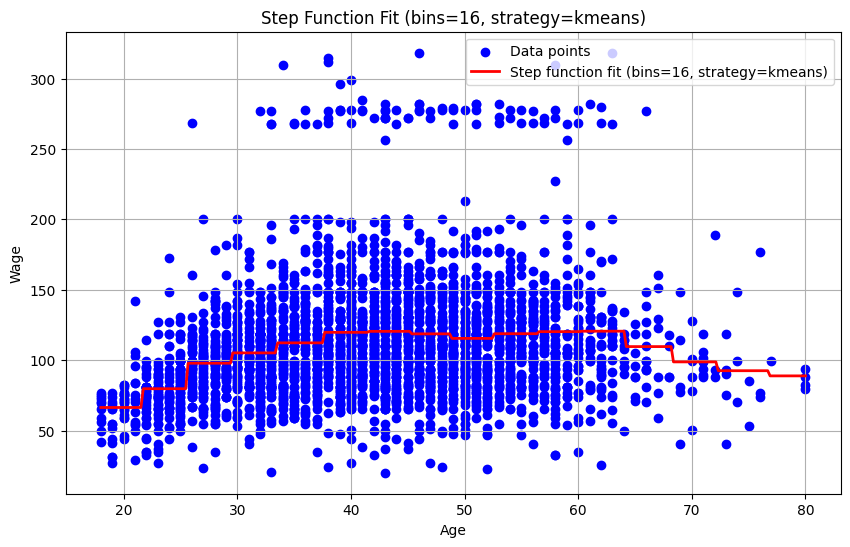

In [24]:
#2 Rerun on different strategies to see what would happen

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
import pandas as pd

# Define the KFold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=101)

# Function to perform step function regression and cross-validation
def step_function_regression(strategy, n_bins, X, y, cv):
    step_model = make_pipeline(
        KBinsDiscretizer(n_bins=n_bins, encode='onehot', strategy=strategy, subsample=None),
        LinearRegression()
    )
    scores = cross_val_score(step_model, X, y, cv=cv, scoring='neg_mean_squared_error')
    return scores.mean()

# Test different strategies and numbers of bins
strategies = ['uniform', 'quantile', 'kmeans']
bins_range = list(range(2, 21))

optimal_bins_strategy = {}
cv_scores_strategies = {}

for strategy in strategies:
    cv_scores_bins = []
    for n_bins in bins_range:
        try:
            score = step_function_regression(strategy, n_bins, X, y, cv)
            cv_scores_bins.append(score)
        except ValueError as e:
            print(f"Error for strategy {strategy} with {n_bins} bins: {e}")
            cv_scores_bins.append(np.nan)

    if cv_scores_bins:  # Ensure we have non-empty scores
        optimal_bins = bins_range[np.nanargmax(cv_scores_bins)]
        optimal_bins_strategy[strategy] = optimal_bins
        cv_scores_strategies[strategy] = cv_scores_bins
        print(f"Optimal number of bins for {strategy}: {optimal_bins}")
    else:
        print(f"No valid scores for strategy {strategy}")
        optimal_bins_strategy[strategy] = None
        cv_scores_strategies[strategy] = []

# Determine the best strategy based on cross-validation scores
valid_strategies = {k: v for k, v in cv_scores_strategies.items() if v}
if valid_strategies:
    best_strategy = max(valid_strategies, key=lambda k: max(valid_strategies[k]))
    print(f"The best strategy is {best_strategy} with {optimal_bins_strategy[best_strategy]} bins")
else:
    best_strategy = None
    print("No valid strategy found")

# Fit and plot the best model for each strategy
for strategy in strategies:
    optimal_bins = optimal_bins_strategy[strategy]
    if optimal_bins is not None:
        step_model = make_pipeline(
            KBinsDiscretizer(n_bins=optimal_bins, encode='onehot', strategy=strategy, subsample=None),
            LinearRegression()
        )
        step_model.fit(X, y)

        X_plot = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
        y_step_plot = step_model.predict(X_plot)

        plt.figure(figsize=(10, 6))
        plt.scatter(X, y, color='blue', label='Data points')
        plt.plot(X_plot, y_step_plot, color='red', linewidth=2, label=f'Step function fit (bins={optimal_bins}, strategy={strategy})')
        plt.xlabel('Age')
        plt.ylabel('Wage')
        plt.title(f'Step Function Fit (bins={optimal_bins}, strategy={strategy})')
        plt.legend()
        plt.grid(True)
        plt.show()

In [ ]:
#As suspected from the linear relationship seen between age and wage, uniform was best


## **Part C** <font color="blue">(4 points)</font>
Apply SVM and random forests to a data set of your choice. Be sure to fit the models on a training set and to evaluate their performance on a test set. How accurate are the results compared to each other? Which of them yields the best performance?


In [25]:
#0 Load and Explore the Datasets

# Using our Colab traditional method (Part 1)

from google.colab import files
uploaded = files.upload()

HS = pd.read_csv('house_small.csv').dropna(axis='columns')

# Explore the data to understand its structure
print("House_Small head:\n", HS.head())
print("\n House_Small shape:", HS.shape)
print("\n House_Small info: ", HS.info())

import seaborn as sns

HS.head()

Saving house_small.csv to house_small.csv
House_Small head:
    Unnamed: 0  Sq_Ft_Tot_Living  Sq_Ft_Lot  Bathroom_count  Bedroom_count  \
0           1              2400       9373            3.00              6   
1           2              3764      20156            3.75              4   
2           3              2060      26036            1.75              4   
3           4              3200       8618            3.75              5   
4           5              1720       8620            1.75              4   

   Bldg_Grade  Property_Type  Nbr_Living_Units  Sq_Ft_Fin_Basement  Yr_Built  \
0           7      Multiplex                 2                   0      1991   
1          10  Single Family                 1                1452      2005   
2           8  Single Family                 1                 900      1947   
3           7  Single Family                 1                1640      1966   
4           7  Single Family                 1                   0      1948

Unnamed: 0  Sq_Ft_Tot_Living  Sq_Ft_Lot  Bathroom_count  Bedroom_count  \
0           1              2400       9373            3.00              6   
1           2              3764      20156            3.75              4   
2           3              2060      26036            1.75              4   
3           4              3200       8618            3.75              5   
4           5              1720       8620            1.75              4   

   Bldg_Grade  Property_Type  Nbr_Living_Units  Sq_Ft_Fin_Basement  Yr_Built  \
0           7      Multiplex                 2                   0      1991   
1          10  Single Family                 1                1452      2005   
2           8  Single Family                 1                 900      1947   
3           7  Single Family                 1                1640      1966   
4           7  Single Family                 1                   0      1948   

   Yr_Renovated  Newly_Construction  House_Sale_Price  
0             0               False          300805.0  
1             0                True         1076162.0  
2             0               False          761805.0  
3             0               False          442065.0  
4             0               False          297065.0

In [26]:
HS.describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99], include='all')

Unnamed: 0  Sq_Ft_Tot_Living     Sq_Ft_Lot  Bathroom_count  \
count   22689.000000      22689.000000  2.268900e+04    22689.000000   
unique           NaN               NaN           NaN             NaN   
top              NaN               NaN           NaN             NaN   
freq             NaN               NaN           NaN             NaN   
mean    13506.127992       2080.258275  1.174621e+04        2.176550   
std      7765.374954        913.791565  2.901475e+04        0.768044   
min         1.000000        370.000000  4.940000e+02        0.000000   
1%        271.880000        740.000000  1.070000e+03        1.000000   
10%      2779.800000       1100.000000  3.000000e+03        1.000000   
25%      6750.000000       1420.000000  4.800000e+03        1.750000   
50%     13600.000000       1910.000000  7.200000e+03        2.250000   
75%     20158.000000       2540.000000  9.794000e+03        2.500000   
90%     24322.200000       3250.000000  1.630000e+04        3.000000   
99%     26744.120000       5060.000000  1.143624e+05        4.250000   
max     27063.000000      10740.000000  1.024068e+06        8.000000   

        Bedroom_count    Bldg_Grade  Property_Type  Nbr_Living_Units  \
count    22689.000000  22689.000000          22689      22689.000000   
unique            NaN           NaN              3               NaN   
top               NaN           NaN  Single Family               NaN   
freq              NaN           NaN          20722               NaN   
mean         3.367843      7.680991            NaN          1.018820   
std          0.904414      1.180565            NaN          0.159745   
min          0.000000      3.000000            NaN          1.000000   
1%           2.000000      6.000000            NaN          1.000000   
10%          2.000000      6.000000            NaN          1.000000   
25%          3.000000      7.000000            NaN          1.000000   
50%          3.000000      7.000000            NaN          1.000000   
75%          4.000000      8.000000            NaN          1.000000   
90%          4.000000      9.000000            NaN          1.000000   
99%          6.000000     11.000000            NaN          2.000000   
max         33.000000     13.000000            NaN          5.000000   

        Sq_Ft_Fin_Basement      Yr_Built  Yr_Renovated Newly_Construction  \
count         22689.000000  22689.000000  22689.000000              22689   
unique                 NaN           NaN           NaN                  2   
top                    NaN           NaN           NaN              False   
freq                   NaN           NaN           NaN              20295   
mean            293.240072   1971.194588    102.305743                NaN   
std             439.449560     30.315556    440.560634                NaN   
min               0.000000   1900.000000      0.000000                NaN   
1%                0.000000   1904.000000      0.000000                NaN   
10%               0.000000   1925.000000      0.000000                NaN   
25%               0.000000   1950.000000      0.000000                NaN   
50%               0.000000   1977.000000      0.000000                NaN   
75%             580.000000   2000.000000      0.000000                NaN   
90%             960.000000   2006.000000      0.000000                NaN   
99%            1611.200000   2011.000000   2009.000000                NaN   
max            3500.000000   2015.000000   2016.000000                NaN   

        House_Sale_Price  
count       2.268900e+04  
unique               NaN  
top                  NaN  
freq                 NaN  
mean        5.652523e+05  
std         3.854195e+05  
min         3.368000e+03  
1%          1.799858e+05  
10%         2.896030e+05  
25%         3.605630e+05  
50%         4.713150e+05  
75%         6.494430e+05  
90%         8.962686e+05  
99%         2.049693e+06  
max         1.164486e+07

In [ ]:
#From a quick check, most houses are single family and not new builds.As well, no glaring data entry errors exist on the independent variables (i.e. outliers are within the realm of reason)
#There are crazy outliers in the target variable that probably doesn't reflect the rest of the data, but we will explore that latter

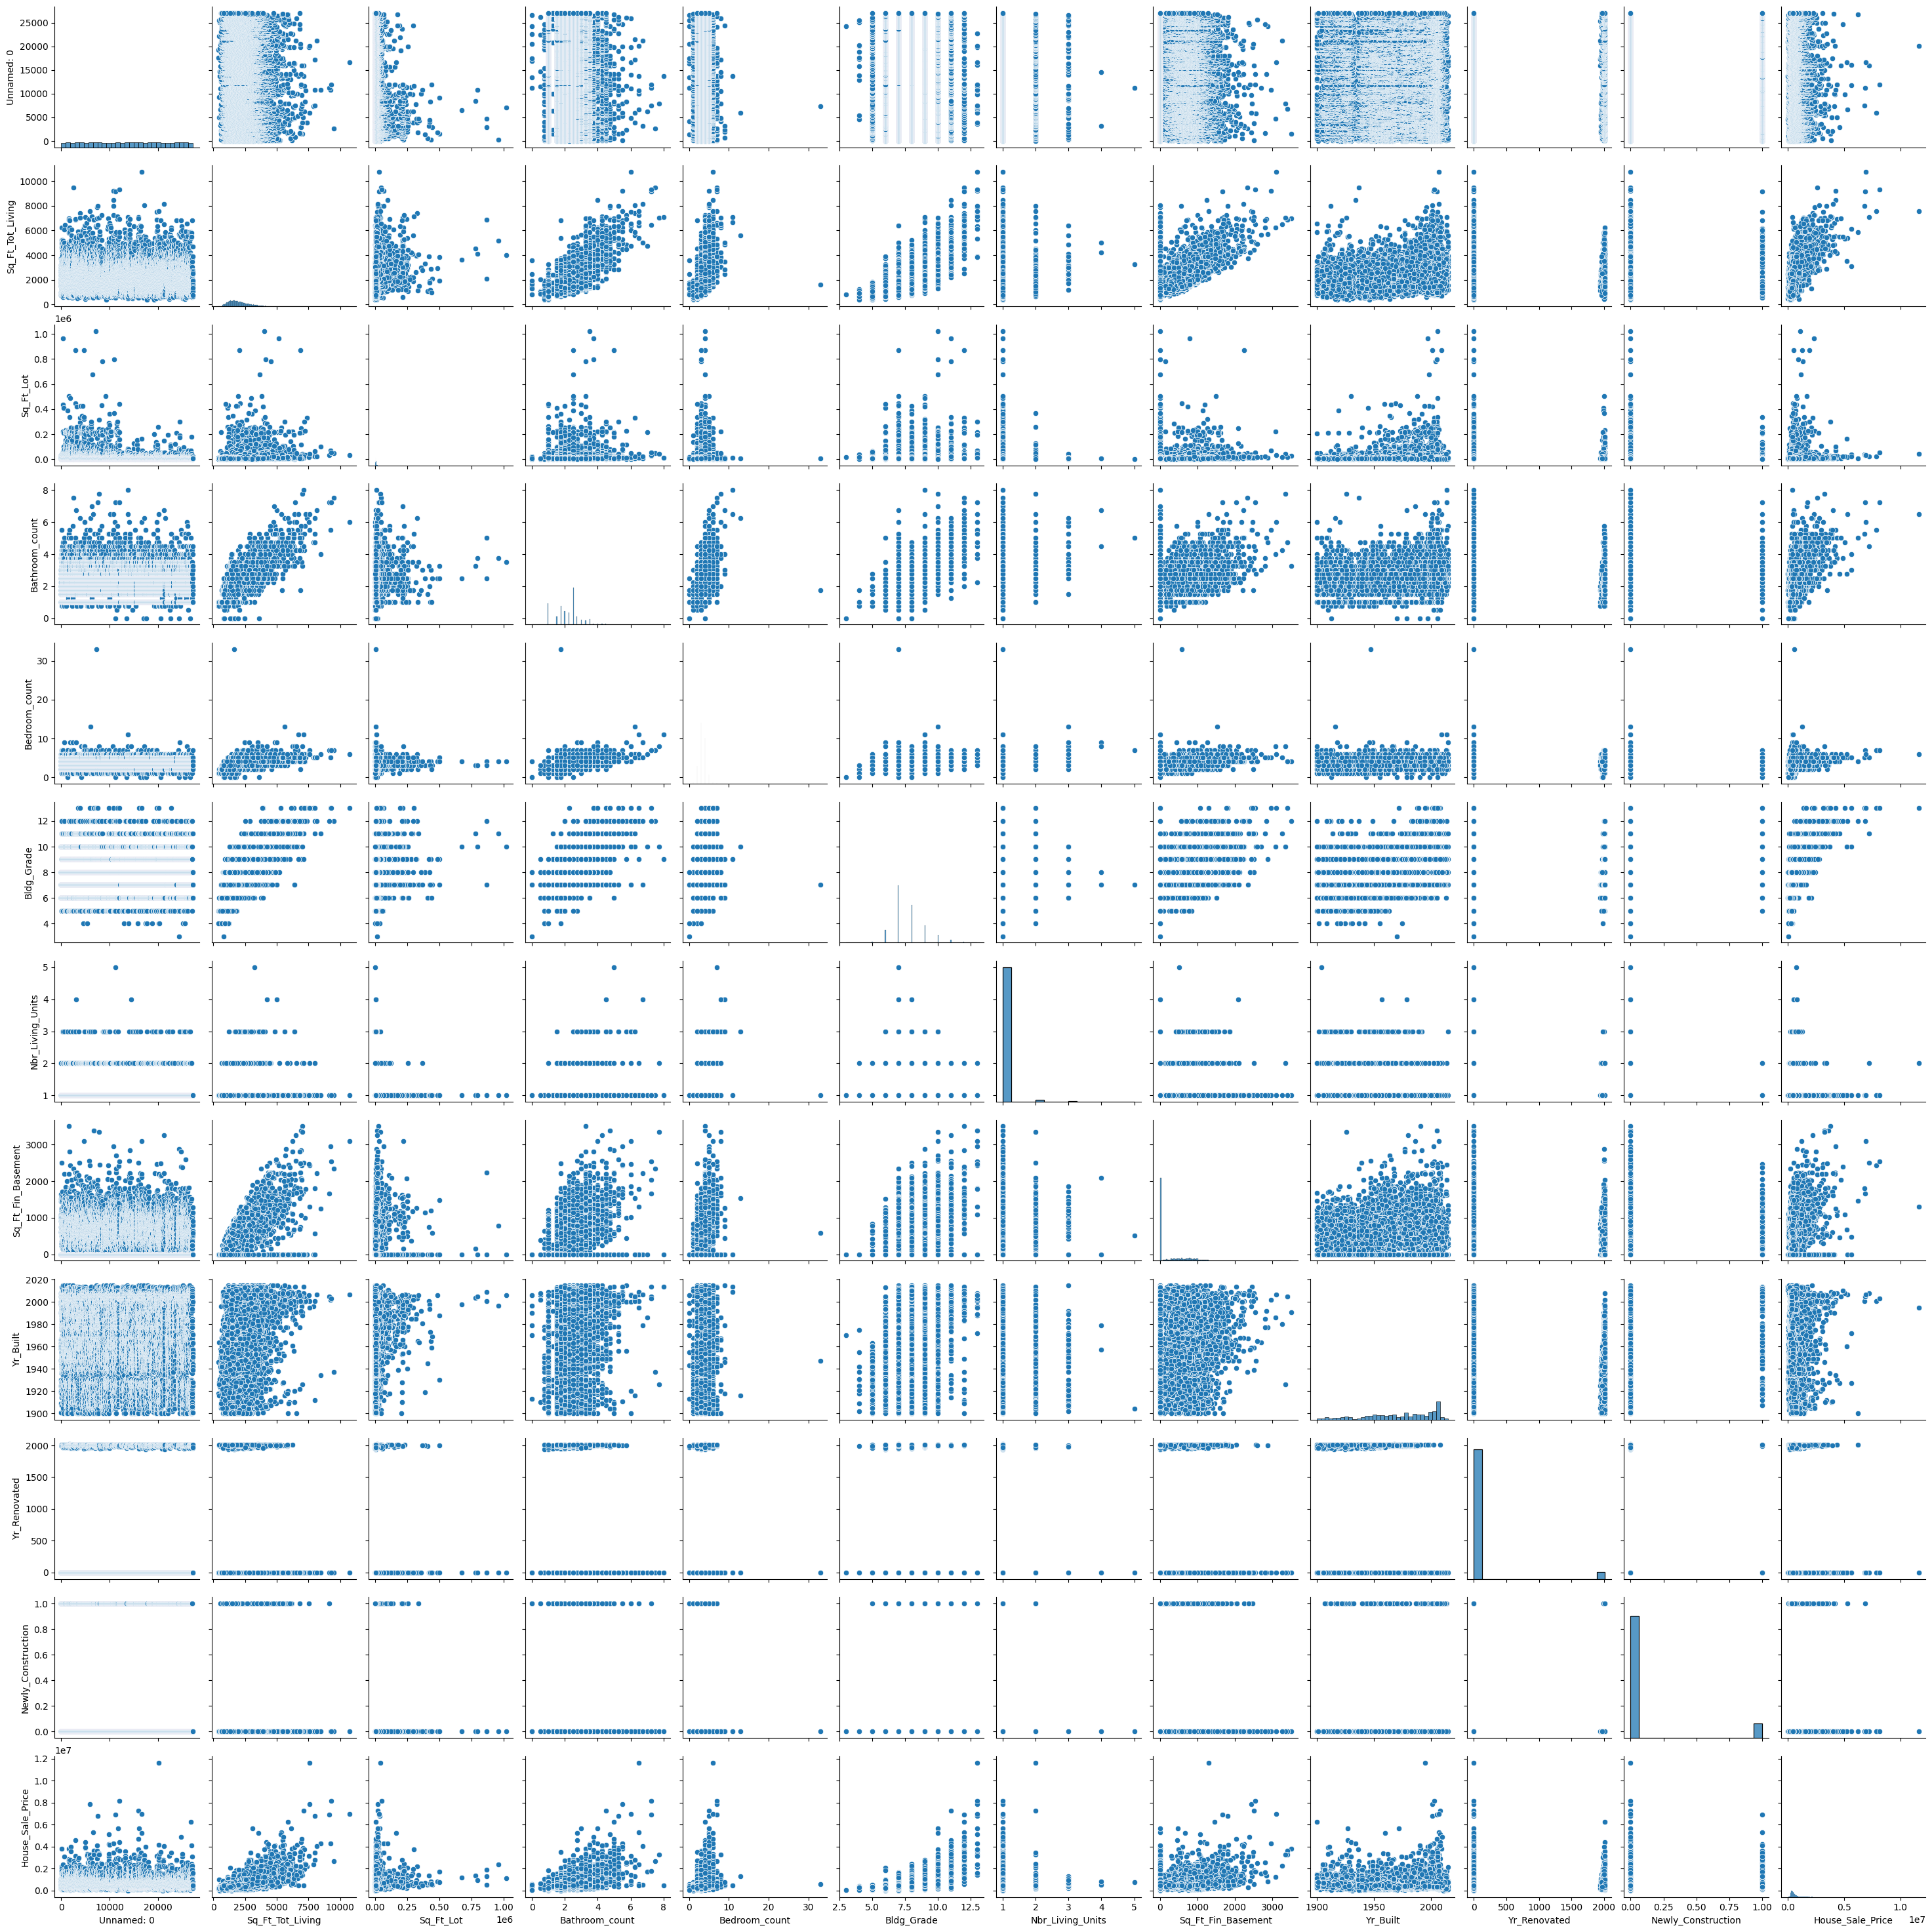

In [27]:
sns.pairplot(data=HS)

In [ ]:
#No surprising correlation insights gained from this.
#Obviously price is positively correlated to sq_ft_tot_living, and obviously sq_ft_tot_living is positively correlated to bathroom and bedroom count, and sq_ft_fin_basement
#Interestingly, Yr_Renovated seems to be either 0 or ~2000. Suggests rennovation data before 2000 was not collected sufficiently

In [28]:
HS['Yr_Renovated'].value_counts()

Yr_Renovated
0       21528
2006       80
2007       80
2005       75
2008       61
        ...  
1964        1
2016        1
1973        1
1945        1
1943        1
Name: count, Length: 67, dtype: int64

<Figure size 1200x500 with 0 Axes>

<Axes: >

<Axes: xlabel='Yr_Renovated', ylabel='Count'>

Text(0.5, 1.0, 'Yr_Renovated Distribution')

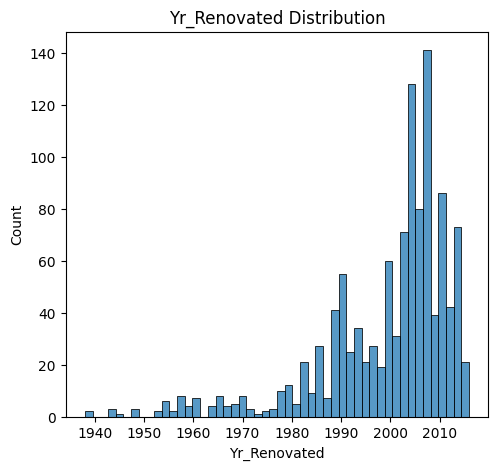

In [29]:
# Visualize the distribution of Yr_Renovated
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(HS[HS['Yr_Renovated']>0]['Yr_Renovated'], kde=False, bins=50)
plt.title('Yr_Renovated Distribution')

In [30]:
HS[(HS['Newly_Construction']!=False)&(HS['Yr_Built']==1907)].head()

Unnamed: 0  Sq_Ft_Tot_Living  Sq_Ft_Lot  Bathroom_count  Bedroom_count  \
17070       20224              1640       4400             2.0              3   

       Bldg_Grade  Property_Type  Nbr_Living_Units  Sq_Ft_Fin_Basement  \
17070           7  Single Family                 2                 800   

       Yr_Built  Yr_Renovated  Newly_Construction  House_Sale_Price  
17070      1907             0                True          559481.0

In [ ]:
#Note the definition of "Newly_Construction" is not clear, as there are "New Builds" today built in 1907.
#I expected the minimum of Yr_Built when Newly_Contruction is True so be something more recent, i.e. all houses past 2020.
#Nor is it a simple matter of using the max of Yr_Built and Yr_Renovated, as we can see in the example above.

#Based on these pairplots, it looks like the independent variable which is most predictive of the sale price is Sq_Ft_Tot_Living
#Other variables have much weaker correlations, or are heavily correlated with Sq_Ft_Tot_Living (i.e. Bathroom_count and Sq_Ft_Fin_Basement)
#For simplicity and to ensure parsimony, we will use just this 1 independent variable to predict House_Sale_Price
#Additional variables can be explored in the future, but they are not suitable for our Minimum Viable Product at this time.

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='Sq_Ft_Tot_Living', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Sq_Ft_Tot_Living')

Text(0.5, 0, 'Sq_Ft_Tot_Living')

Text(0, 0.5, 'Frequency')

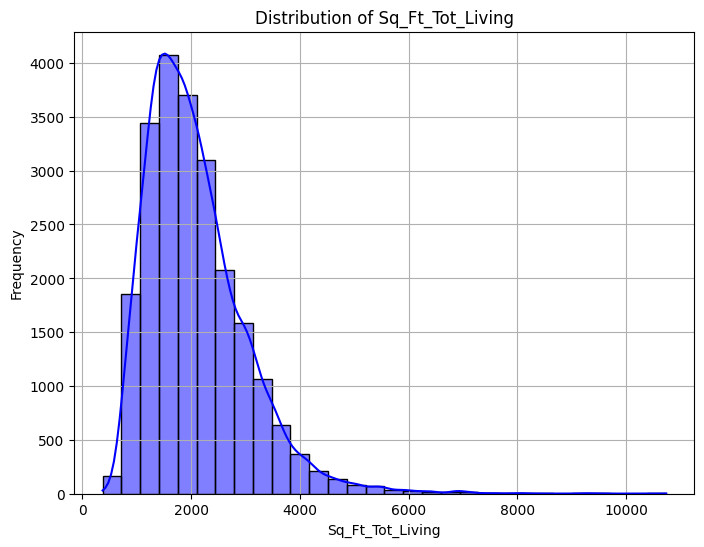

In [31]:
#Now we better understand the distribution of our only independant variable to decide if standardization (z-score normalization) makes more sense than normalization (min-max scaling)
#If it looks approx. Gaussian, i.e. the bell curve, we use standardization.

# Plotting the histogram
plt.figure(figsize=(8, 6))
sns.histplot(HS['Sq_Ft_Tot_Living'], bins=30, kde=True, color='blue')
plt.title('Distribution of Sq_Ft_Tot_Living')
plt.xlabel('Sq_Ft_Tot_Living')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
#It is approx. normal, and skewed to the right, so we will use standardization

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='House_Sale_Price', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of House_Sale_Price')

Text(0.5, 0, 'House_Sale_Price')

Text(0, 0.5, 'Frequency')

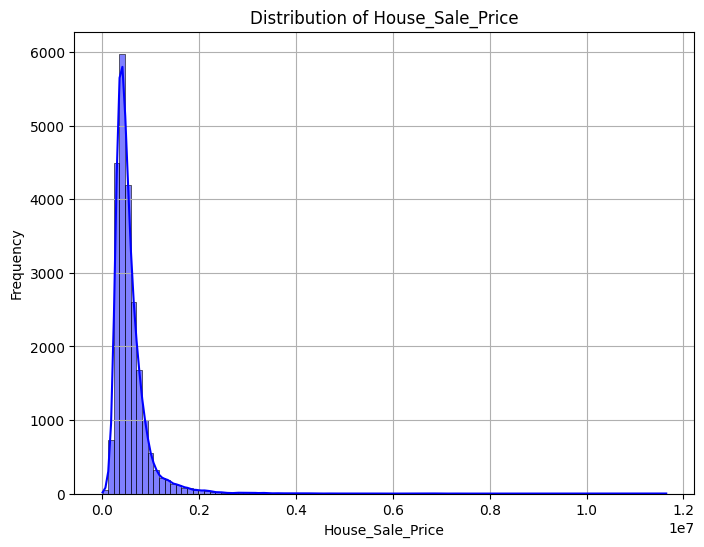

In [32]:
#Repeat to better understand our dependant variable

# Plotting the histogram
plt.figure(figsize=(8, 6))
sns.histplot(HS['House_Sale_Price'], bins=100, kde=True, color='blue')
plt.title('Distribution of House_Sale_Price')
plt.xlabel('House_Sale_Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
#It looks like we definitely have outlier in upper end of House_Sale_Price. Lets see if these outliers follow the trend of the rest of the data.

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Sq_Ft_Tot_Living')

Text(0, 0.5, 'House_Sale_Price')

Text(0.5, 1.0, 'Scatter plot of Sq_Ft_Tot_Living vs House_Sale_Price with Outliers')

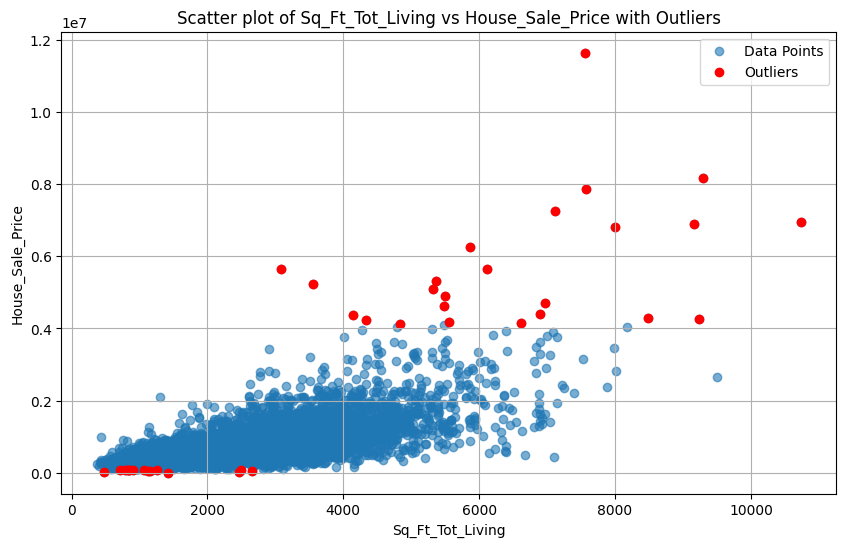

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

Q01 = HS['House_Sale_Price'].quantile(0.01)
Q99 = HS['House_Sale_Price'].quantile(0.99)

# Determine outliers. Domain knowledge driven definition
lower_bound = 0.5 * Q01
upper_bound = 2 * Q99
outliers = HS[(HS['House_Sale_Price'] < lower_bound) | (HS['House_Sale_Price'] > upper_bound)]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(HS['Sq_Ft_Tot_Living'], HS['House_Sale_Price'], label='Data Points', alpha=0.6)
plt.scatter(outliers['Sq_Ft_Tot_Living'], outliers['House_Sale_Price'], color='red', label='Outliers')
plt.xlabel('Sq_Ft_Tot_Living')
plt.ylabel('House_Sale_Price')
plt.title('Scatter plot of Sq_Ft_Tot_Living vs House_Sale_Price with Outliers')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
#Let's drop these outliers to be conservative
HS_no_outliers = HS.drop(outliers.index)

In [ ]:
#Now that we better understand the data, and our preliminary EDA is done, we can move on to the modeling

fit the models on a training set and to evaluate their performance on a test set. How accurate are the results compared to each other? Which of them yields the best performance?

In [43]:
#Load necessary libraries and the dataset
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import display, HTML

from sklearn.model_selection import train_test_split

from sklearn.svm import SVR # "Support vector classifier"
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.model_selection import GridSearchCV

# use seaborn plotting defaults
import seaborn as sns; sns.set()

X_HS = HS_no_outliers[['Sq_Ft_Tot_Living']].values
y_HS = HS_no_outliers['House_Sale_Price'].values

random_state=101

In [37]:
# Preprocess features (standardization)
#This step standardizes Sq_Ft_Tot_Living to have zero mean and unit variance.
#This ensures that both SVM and Random Forest models are trained on standardized data, which can lead to better performance and convergence.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_HS)

In [38]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_HS, test_size=0.3, random_state=random_state) # 70% training and 30% test

Random Forest

In [45]:
# Define a grid of parameters to search over
param_grid = {
    'n_estimators': [10, 50, 100, 200, 300, 500],
}

# Initialize RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=random_state)

# Initialize GridSearchCV with RandomForestRegressor and parameter grid
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Perform Grid Search to find the best n_estimators
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best CV RMSE:", np.sqrt(-grid_search.best_score_))

# Predict using the best model found by GridSearchCV
best_rf_regressor = grid_search.best_estimator_
y_pred = best_rf_regressor.predict(X_test)

# Calculate RMSE on the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE with best model: {test_rmse}")

optimal_n_estimators = grid_search.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=101), n_jobs=-1,
             param_grid={'n_estimators': [10, 50, 100, 200, 300, 500]},
             scoring='neg_mean_squared_error', verbose=1)

Best Parameters: {'n_estimators': 200}
Best CV RMSE: 241108.3261615841
Test RMSE with best model: 247060.49070706766


In [47]:
# Initialize the model
rf = RandomForestRegressor(n_estimators=200, random_state=random_state)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf.predict(X_test)

RandomForestRegressor(n_estimators=200, random_state=101)

In [56]:
# Calculate evaluation metrics
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rf_mae = mean_absolute_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

print(f"Random Forest RMSE: {rf_rmse}")
print(f"Random Forest MAE: {rf_mae}")
print(f"Random Forest R-squared: {rf_r2}")

Random Forest RMSE: 247060.49070706766
Random Forest MAE: 150455.00107291335
Random Forest R-squared: 0.5015148275245622


In [ ]:
#This shows the model explains a significant portion (50%) of the variance in the dependent variable, House_Sale_Price.
#This serves as a baseline for future model improvement

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Actual')

Text(0, 0.5, 'Predicted')

Text(0.5, 1.0, 'Actual vs Predicted Values for Random Forest')

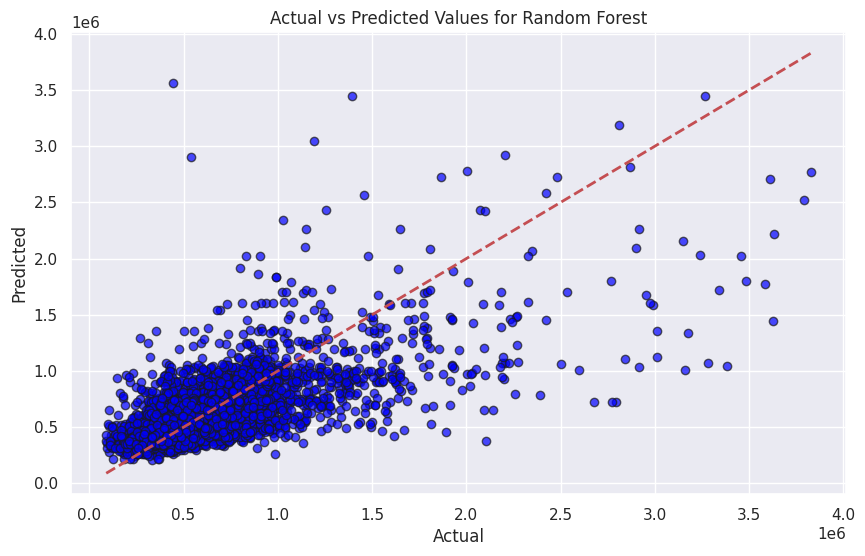

In [49]:
# Plotting the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values for Random Forest')
plt.grid(True)
plt.show()

SVM

In [50]:
# Initialize SVM model
svm_regressor = SVR()

# Define the parameters for grid search
param_grid = {
    'kernel': ['linear'],
    'C': [0.1, 10, 100, 1000],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm_regressor, param_grid=param_grid, cv=5, scoring='r2')

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best R^2 Score: {best_score}")

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 10, 100, 1000], 'kernel': ['linear']},
             scoring='r2')

Best Parameters: {'C': 1000, 'kernel': 'linear'}
Best R^2 Score: 0.4717517959928079


In [52]:
# Initialize SVM model
svm_regressor = SVR(kernel='linear', C=1000)

# Fit SVM model on training data
svm_regressor.fit(X_train, y_train)

# Predict using SVM model
y_pred_svm = svm_regressor.predict(X_test)

# Evaluate SVM model
svm_rmse = mean_squared_error(y_test, y_pred_svm, squared=False)
svm_mae = mean_absolute_error(y_test, y_pred_svm)
svm_r2 = r2_score(y_test, y_pred_svm)

print(f"SVM RMSE: {svm_rmse}")
print(f"SVM MAE: {svm_mae}")
print(f"SVM R^2 Score: {svm_r2}")

SVR(C=1000, kernel='linear')

SVM RMSE: 257217.63768215303
SVM MAE: 150713.4286965466
SVM R^2 Score: 0.4596848612512334


In [ ]:
#This shows the model explains a significant portion (~46%) of the variance in the dependent variable, House_Sale_Price.
#This serves as a baseline for future model improvement

In [57]:
#Given Random Forest gives higher R^2 and lower RMSE and lower MAE, Random Forest is the superior model
improvement_rmse = rf_rmse / svm_rmse - 1
improvement_mae = rf_mae / svm_mae - 1
improvement_r2 = rf_r2 / svm_r2 - 1

# Print the results. Note negative change in RMSE and MAE means SVM is worse than RF
print(f"Improvement in RMSE: {improvement_rmse:.4f}")
print(f"Improvement in MAE: {improvement_mae:.4f}")
print(f"Improvement in R^2 Score: {improvement_r2:.4f}")

Improvement in RMSE: -0.0395
Improvement in MAE: -0.0017
Improvement in R^2 Score: 0.0910


In [ ]:
#Future enhancements include exploring more hyperparameter tuning, more feature engineering, and introducing more independent variables

## **Part D** <font color="blue">(3 points)</font>

1. **<font color="blue">(1 point)</font>** Generate $2$-dimentional data with $500$ observations from $3$ Gaussian clusters.
2. **<font color="blue">(0.5 points)</font>** Use a scatterplot to visualize the produced data.
3. **<font color="blue">(1 point)</font>** Shuffle the data and use $K$-means, with $K=2,3,4$ to cluster the data.
4. **<font color="blue">(0.5 points)</font>** Visualize the results, separately.  


<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Generated 2D Data from 3 Gaussian Clusters')

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature 2')

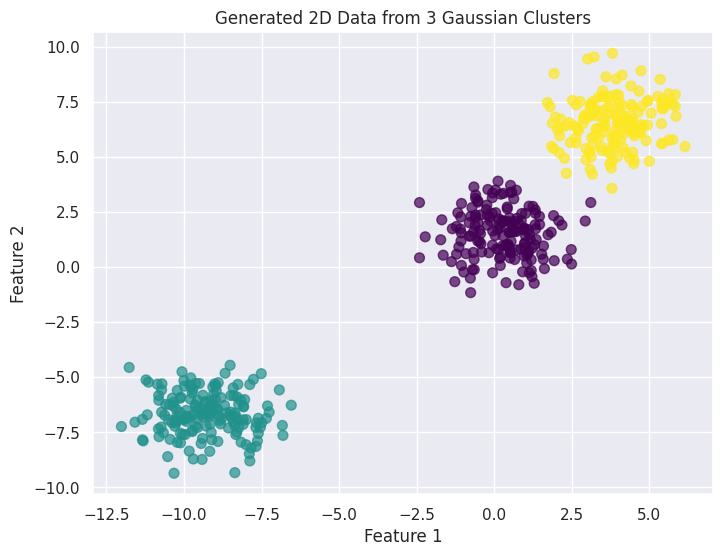

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'K-means Clustering with K=2')

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature 2')

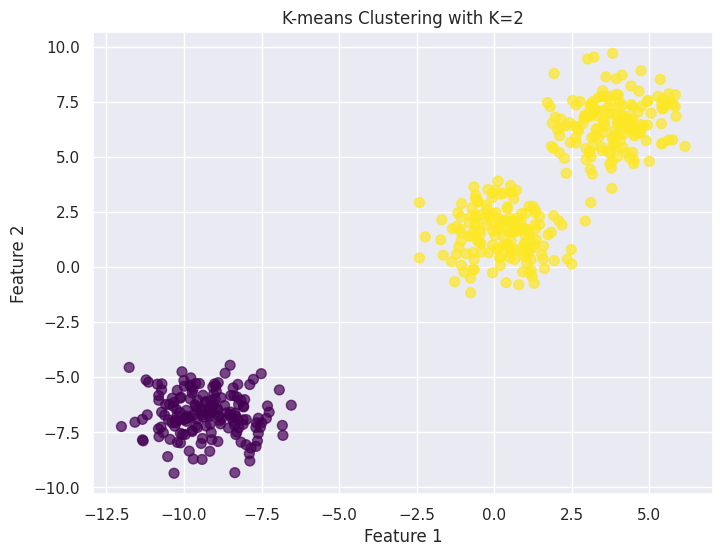

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'K-means Clustering with K=3')

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature 2')

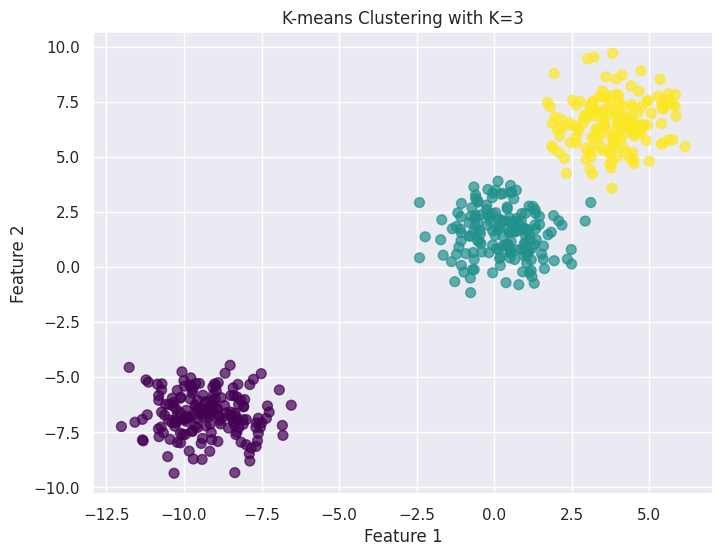

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'K-means Clustering with K=4')

Text(0.5, 0, 'Feature 1')

Text(0, 0.5, 'Feature 2')

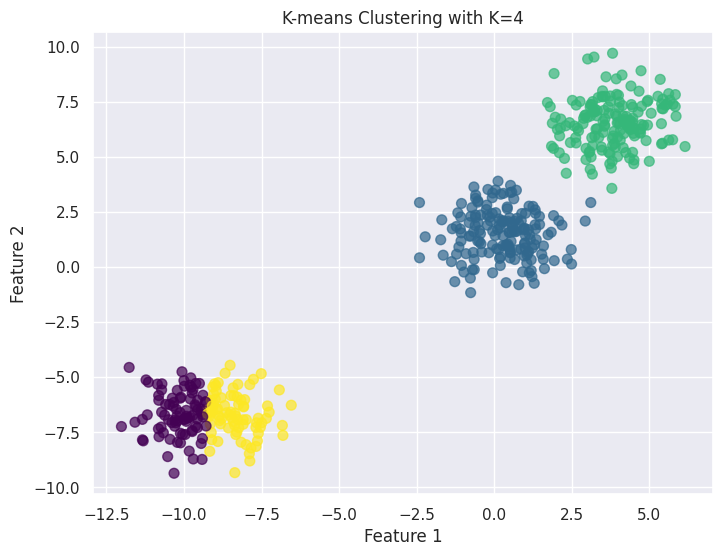

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

random_state = 101

# 1. Generate 2-dimensional data with 500 observations from 3 Gaussian clusters
n_samples = 500
n_features = 2
n_clusters = 3
X, y_true = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=random_state)

# 2. Visualize the produced data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=50, alpha=0.7)
plt.title('Generated 2D Data from 3 Gaussian Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

# 3. Shuffle the data
X_shuffled, y_shuffled = shuffle(X, y_true, random_state=random_state)

# 4. Apply K-means clustering with K=2, 3, 4
k_values = [2, 3, 4]
kmeans_models = [KMeans(n_clusters=k, random_state=random_state, n_init=10).fit(X_shuffled) for k in k_values]

# 5. Visualize the results separately
for k, kmeans in zip(k_values, kmeans_models):
    y_kmeans = kmeans.labels_

    plt.figure(figsize=(8, 6))
    plt.scatter(X_shuffled[:, 0], X_shuffled[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.7)
    plt.title(f'K-means Clustering with K={k}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.show()
    #Visually, it appears the optimal number of clusters is 3. We can test this however

KMeans(n_clusters=1, n_init=10, random_state=101)

KMeans(n_clusters=2, n_init=10, random_state=101)

KMeans(n_clusters=3, n_init=10, random_state=101)

KMeans(n_clusters=4, n_init=10, random_state=101)

KMeans(n_clusters=5, n_init=10, random_state=101)

KMeans(n_clusters=6, n_init=10, random_state=101)

KMeans(n_clusters=7, n_init=10, random_state=101)

KMeans(n_init=10, random_state=101)

KMeans(n_clusters=9, n_init=10, random_state=101)

KMeans(n_clusters=10, n_init=10, random_state=101)

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Elbow Method for Optimal K')

Text(0.5, 0, 'Number of Clusters (K)')

Text(0, 0.5, 'Within-Cluster Sum of Squares (WCSS)')

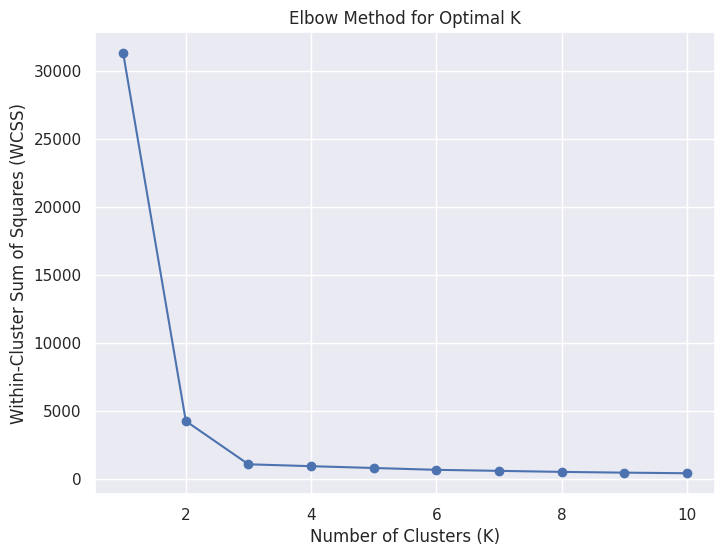

KMeans(n_clusters=2, n_init=10, random_state=101)

KMeans(n_clusters=3, n_init=10, random_state=101)

KMeans(n_clusters=4, n_init=10, random_state=101)

KMeans(n_clusters=5, n_init=10, random_state=101)

KMeans(n_clusters=6, n_init=10, random_state=101)

KMeans(n_clusters=7, n_init=10, random_state=101)

KMeans(n_init=10, random_state=101)

KMeans(n_clusters=9, n_init=10, random_state=101)

KMeans(n_clusters=10, n_init=10, random_state=101)

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Silhouette Scores for Different K')

Text(0.5, 0, 'Number of Clusters (K)')

Text(0, 0.5, 'Silhouette Score')

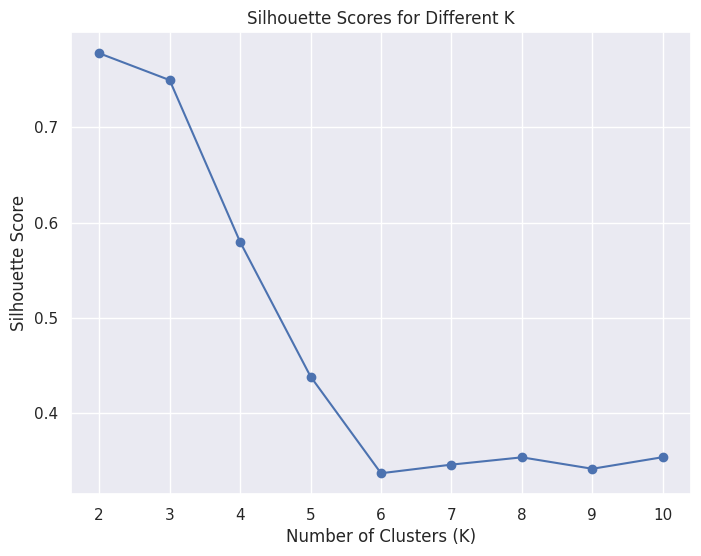

In [59]:
from sklearn.metrics import silhouette_score

# Elbow Method: Determine optimal number of clusters
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=random_state, n_init=10)
    kmeans.fit(X_shuffled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()
#The optimal number of clusters is k=3

# Silhouette Score: Determine optimal number of clusters
silhouette_scores = []
k_values = range(2, 11)  # Silhouette score is not defined for k=1
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=random_state, n_init=10)
    kmeans.fit(X_shuffled)
    score = silhouette_score(X_shuffled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()
#The optimal number of clusters is k=6